In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('house-votes-84.data', header=None, names=['class', 'h-infants', 'wproject-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-in-schools', 'anti-satellite', 'aid-to-nicaraguan', 'mx-missile', 'immigration', 'synfuels-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free', 'export-south-africa'])
df.head(3)

,class,h-infants,wproject-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-in-schools,anti-satellite,aid-to-nicaraguan,mx-missile,immigration,synfuels-cutback,education-spending,superfund-right-to-sue,crime,duty-free,export-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [3]:
# Substituindo n = o e y =1 e ? = NaN
df[df == 'n'] = 0
df[df == 'y'] = 1
df = df[df != '?']

In [4]:
# Decision tree não funciona com NaN
# Substituir pelos valores mais comuns

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df))

In [5]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0


In [6]:
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [7]:
# dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state = 6)

In [8]:
tree_clf = DecisionTreeClassifier(max_depth =3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(167.4, 190.26, 'X[3] <= 0.5\ngini = 0.469\nsamples = 304\nvalue = [190, 114]'),
 Text(83.7, 135.9, 'X[2] <= 0.5\ngini = 0.043\nsamples = 182\nvalue = [178, 4]'),
 Text(41.85, 81.53999999999999, 'X[10] <= 0.5\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(20.925, 27.180000000000007, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[11] <= 0.5\ngini = 0.024\nsamples = 163\nvalue = [161, 2]'),
 Text(104.625, 27.180000000000007, 'gini = 0.013\nsamples = 151\nvalue = [150, 1]'),
 Text(146.475, 27.180000000000007, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(251.10000000000002, 135.9, 'X[10] <= 0.5\ngini = 0.177\nsamples = 122\nvalue = [12, 110]'),
 Text(209.25, 81.53999999999999, 'X[14] <= 0.5\ngini = 0.039\nsamples = 101\nvalue = [2, 99]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 94\nvalue = [0, 94]'),
 Te

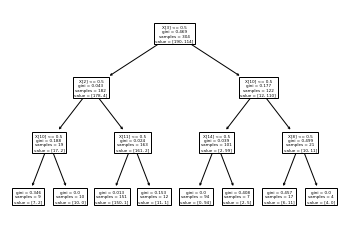

In [9]:
tree.plot_tree(tree_clf)

In [10]:
print(tree_clf.score(X_test, y_test))

0.9694656488549618


In [11]:
# Usando grid Search

In [12]:
cross_valid_scores = {}

In [13]:
parameters = {
    "max_depth": [2, 3, 5, 7, 9, 11],
}


model_desicion_tree = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced'), 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters {'max_depth': 3}
Mean cross-validated accuracy score of the best_estimator: 0.951
-----


In [14]:
# Random Forest

In [15]:
# Grid Search

In [16]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
    "max_leaf_nodes": [3, 5, 7, 9, 11, 13]
}

In [17]:
model_random_forest = GridSearchCV(
    RandomForestClassifier(class_weight='balanced'), 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 11, 'max_leaf_nodes': 11, 'n_estimators': 20}
Mean cross-validated accuracy score of the best_estimator: 0.964
-----


In [18]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=7, max_leaf_nodes=7, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=7, n_estimators=20,
                       n_jobs=-1)

In [19]:
print(rnd_clf.score(X_test, y_test))

0.9541984732824428
